In [22]:
import pandas as pd

url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv'
penguins_df = pd.read_csv(url)

In [23]:
print(penguins_df.head())

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE  


Question 1

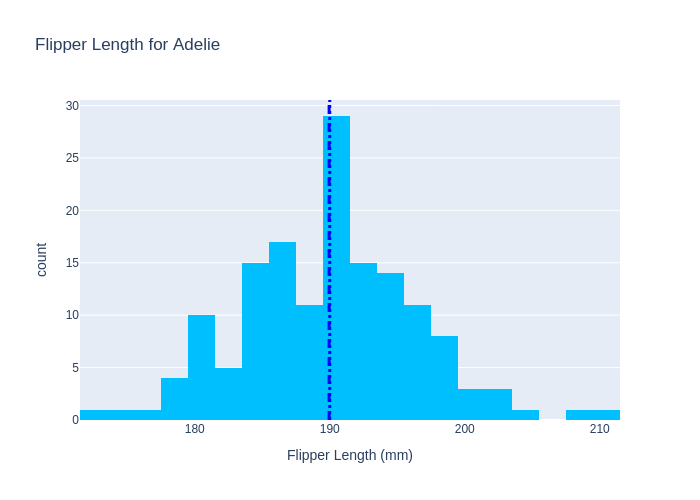

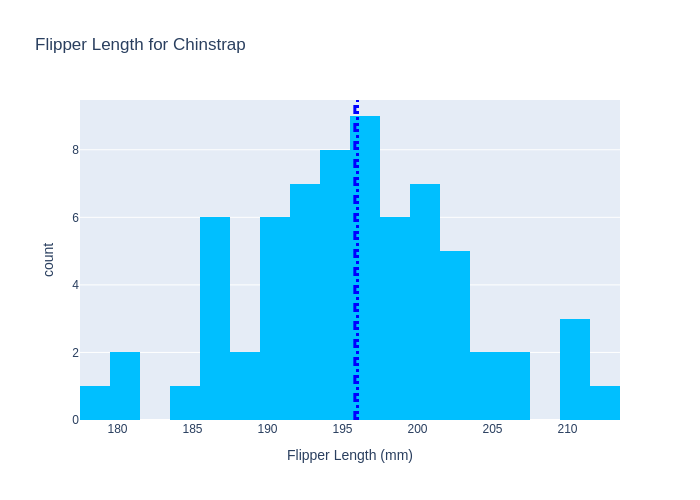

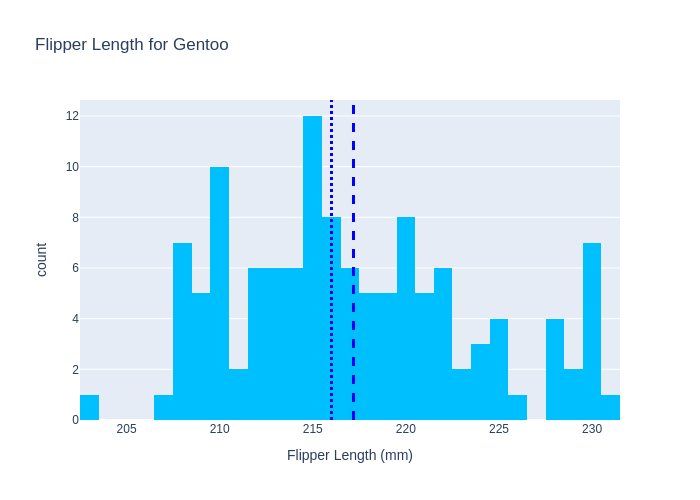

In [25]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

# Load the penguins dataset
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv'
penguins_df = pd.read_csv(url)

# Remove rows with missing values for flipper_length_mm or species
penguins_df = penguins_df.dropna(subset=['flipper_length_mm', 'species'])

# Function to add statistical markers to the histogram
def add_stat_markers(fig, species_data, color):
    # Calculate statistics
    mean_flipper_length = species_data['flipper_length_mm'].mean()
    median_flipper_length = species_data['flipper_length_mm'].median()
    
    # Add vertical lines for mean and median
    fig.add_vline(x=mean_flipper_length, line=dict(color=color, width=3, dash='dash'), name='Mean')
    fig.add_vline(x=median_flipper_length, line=dict(color=color, width=3, dash='dot'), name='Median')

# Loop over each species and plot
for species in penguins_df['species'].unique():
    # Filter the data for the species
    species_data = penguins_df[penguins_df['species'] == species]
    
    # Create a histogram
    fig = px.histogram(species_data, x='flipper_length_mm', nbins=30, title=f'Flipper Length for {species}',
                       labels={'flipper_length_mm': 'Flipper Length (mm)'}, color_discrete_sequence=['deepskyblue'])
    
    # Add statistical markers (mean and median)
    add_stat_markers(fig, species_data, color='blue')
    
    # Show the figure
    fig.show(renderer="png")

<function matplotlib.pyplot.show(close=None, block=None)>

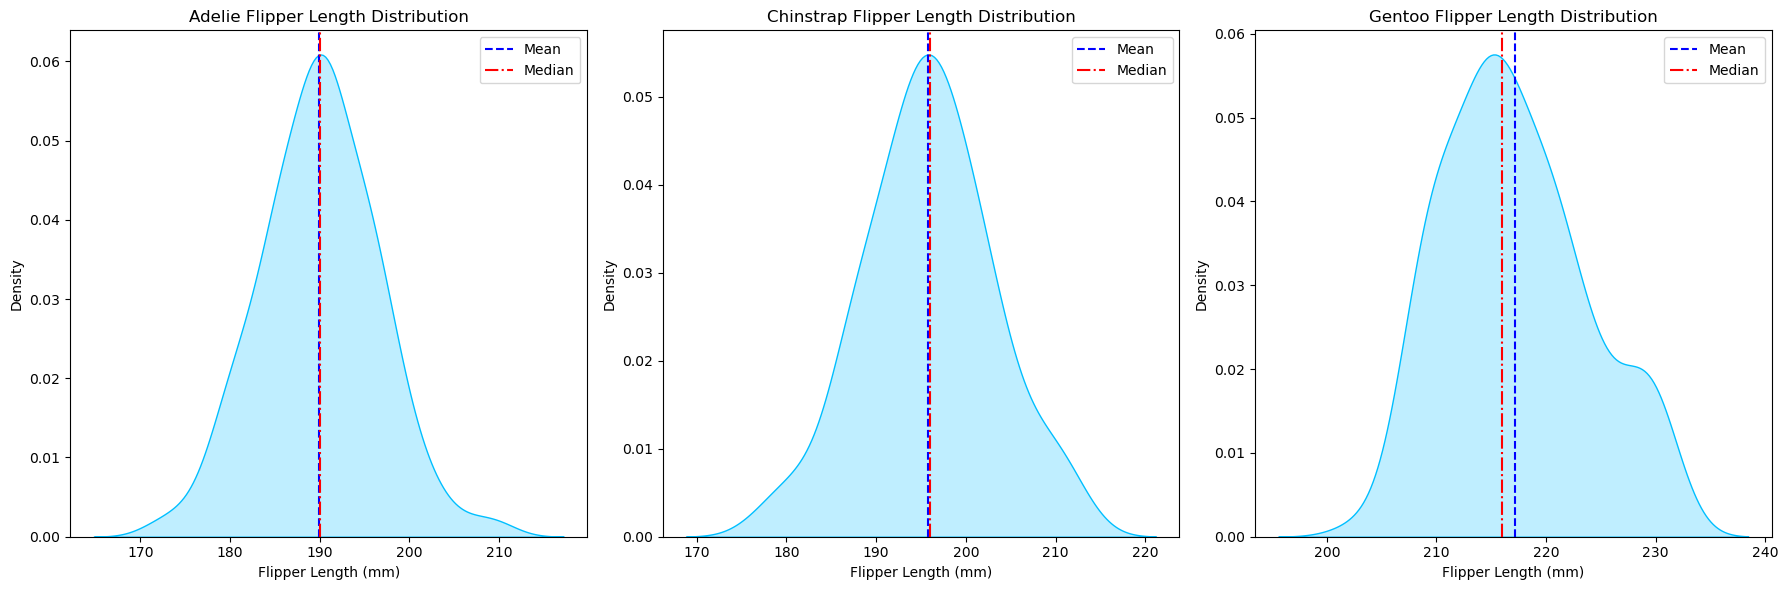

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the penguins dataset
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv'
penguins_df = pd.read_csv(url)

# Remove rows with missing values for flipper_length_mm or species
penguins_df = penguins_df.dropna(subset=['flipper_length_mm', 'species'])

# Get the unique species
species_list = penguins_df['species'].unique()

# Set up the figure and axes for 3 subplots in a row
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Loop over each species and plot the KDE
for i, species in enumerate(species_list):
    # Filter the data for the species
    species_data = penguins_df[penguins_df['species'] == species]
    
    # Calculate statistics
    mean_flipper_length = species_data['flipper_length_mm'].mean()
    median_flipper_length = species_data['flipper_length_mm'].median()
    
    # Plot the KDE for flipper length
    sns.kdeplot(data=species_data, x='flipper_length_mm', ax=axes[i], fill=True, color='deepskyblue')
    
    # Add vertical lines for mean and median
    axes[i].axvline(mean_flipper_length, color='blue', linestyle='--', label='Mean')
    axes[i].axvline(median_flipper_length, color='red', linestyle='-.', label='Median')
    
    # Set the title and labels
    axes[i].set_title(f'{species} Flipper Length Distribution')
    axes[i].set_xlabel('Flipper Length (mm)')
    axes[i].set_ylabel('Density')
    
    # Add a legend
    axes[i].legend()

# Adjust layout
plt.tight_layout()

# Show the figure
plt.show

Question 2

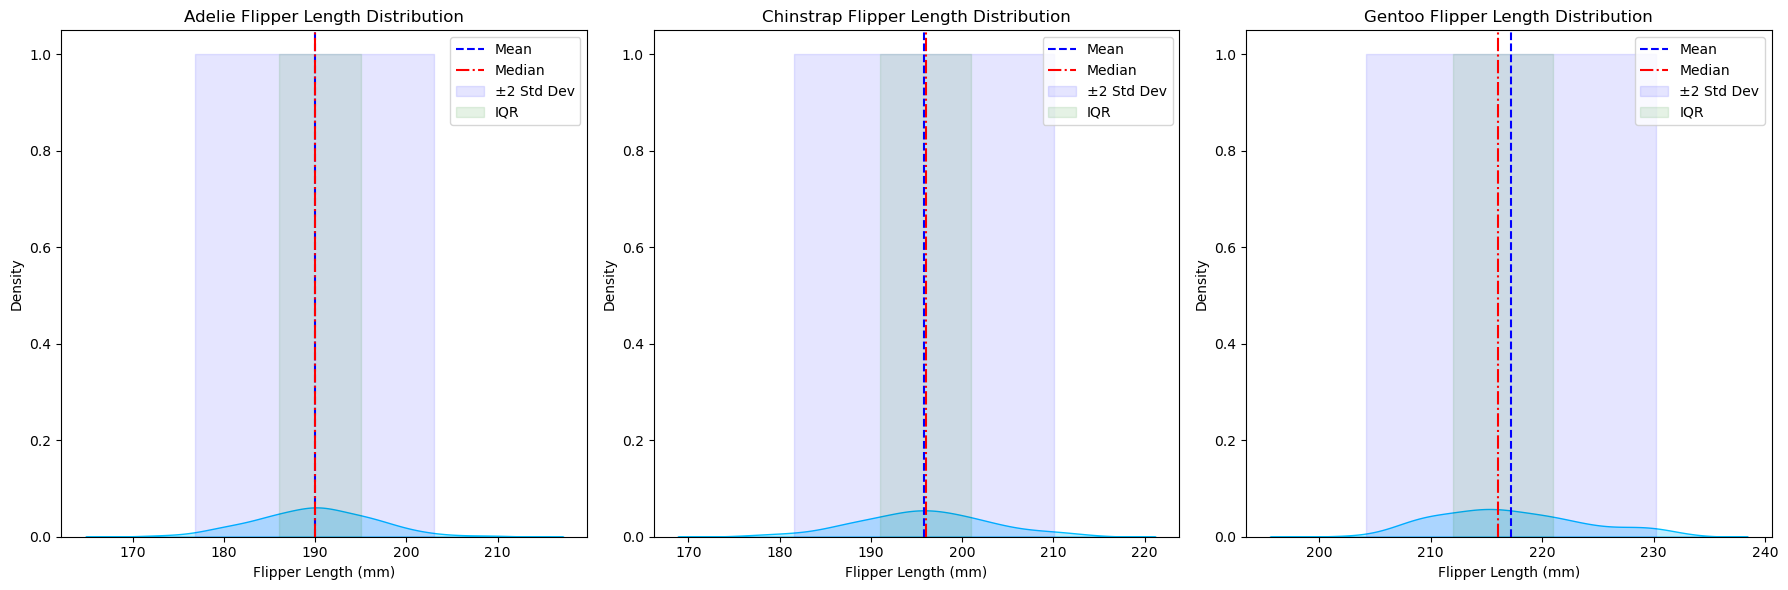

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the penguins dataset
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv'
penguins_df = pd.read_csv(url)

# Remove rows with missing values for flipper_length_mm or species
penguins_df = penguins_df.dropna(subset=['flipper_length_mm', 'species'])

# Get the unique species
species_list = penguins_df['species'].unique()

# Set up the figure and axes for 3 subplots in a row
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Loop over each species and plot the KDE
for i, species in enumerate(species_list):
    # Filter the data for the species
    species_data = penguins_df[penguins_df['species'] == species]
    
    # Calculate statistics
    mean_flipper_length = species_data['flipper_length_mm'].mean()
    median_flipper_length = species_data['flipper_length_mm'].median()
    std_dev = species_data['flipper_length_mm'].std()
    q1 = species_data['flipper_length_mm'].quantile(0.25)
    q3 = species_data['flipper_length_mm'].quantile(0.75)
    
    # Plot the KDE for flipper length
    sns.kdeplot(data=species_data, x='flipper_length_mm', ax=axes[i], fill=True, color='deepskyblue')
    
    # Add vertical lines for mean and median
    axes[i].axvline(mean_flipper_length, color='blue', linestyle='--', label='Mean')
    axes[i].axvline(median_flipper_length, color='red', linestyle='-.', label='Median')
    
    # Highlight the area within two standard deviations of the mean
    axes[i].fill_betweenx(y=[0, 1], x1=mean_flipper_length - 2*std_dev, x2=mean_flipper_length + 2*std_dev, color='blue', alpha=0.1, label='±2 Std Dev')
    
    # Highlight the interquartile range (IQR)
    axes[i].fill_betweenx(y=[0, 1], x1=q1, x2=q3, color='green', alpha=0.1, label='IQR')
    
    # Set the title and labels
    axes[i].set_title(f'{species} Flipper Length Distribution')
    axes[i].set_xlabel('Flipper Length (mm)')
    axes[i].set_ylabel('Density')
    
    # Add a legend
    axes[i].legend()

# Adjust layout
plt.tight_layout()

# Show the figure
plt.show()

Question 3

Of the three graphs I would choose KDE's because they are more versatile. Like histograms they show modality and show a continuous representation of the data. They also show a more nuanced comparison of distribution shape. The downside is that they require a bandwidth parameter, and if not chosen correctly it may alter the data in a way not desired (overfitting and underfitting). They also do not directly show the sample size. Despite all this, I think the pros outweigh the cons as long as the bandwidth is chosen correctly.

Question 4

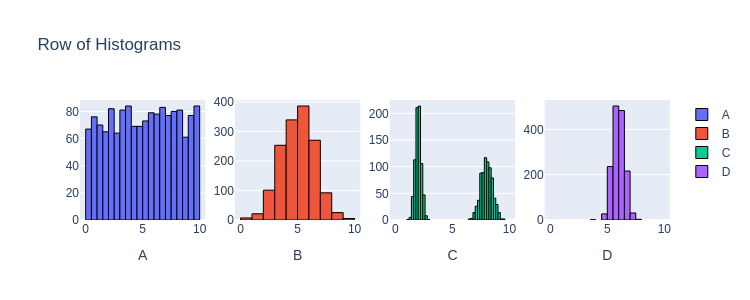

In [30]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

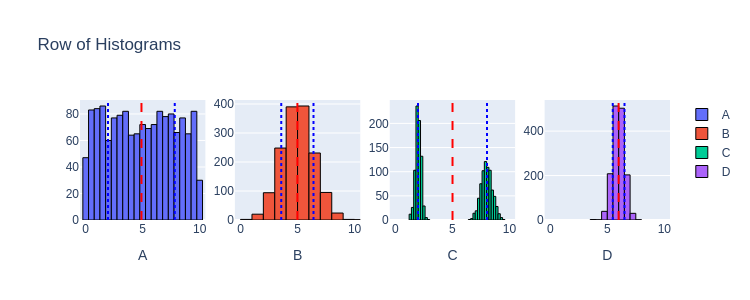

In [31]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

# Sample data
n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

# Calculate statistics (mean, std, variance)
mean1, std1, var1 = np.mean(data1), np.std(data1, ddof=1), np.var(data1, ddof=1)
mean2, std2, var2 = np.mean(data2), np.std(data2, ddof=1), np.var(data2, ddof=1)
mean3, std3, var3 = np.mean(data3), np.std(data3, ddof=1), np.var(data3, ddof=1)
mean4, std4, var4 = np.mean(data4), np.std(data4, ddof=1), np.var(data4, ddof=1)

# Create subplots
fig = make_subplots(rows=1, cols=4)

# Add histograms
fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

# Update layout
fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

# Add mean and standard deviation lines
fig.add_vline(x=mean1, line=dict(color='red', dash='dash'), row=1, col=1)
fig.add_vline(x=mean1 - std1, line=dict(color='blue', dash='dot'), row=1, col=1)
fig.add_vline(x=mean1 + std1, line=dict(color='blue', dash='dot'), row=1, col=1)

fig.add_vline(x=mean2, line=dict(color='red', dash='dash'), row=1, col=2)
fig.add_vline(x=mean2 - std2, line=dict(color='blue', dash='dot'), row=1, col=2)
fig.add_vline(x=mean2 + std2, line=dict(color='blue', dash='dot'), row=1, col=2)

fig.add_vline(x=mean3, line=dict(color='red', dash='dash'), row=1, col=3)
fig.add_vline(x=mean3 - std3, line=dict(color='blue', dash='dot'), row=1, col=3)
fig.add_vline(x=mean3 + std3, line=dict(color='blue', dash='dot'), row=1, col=3)

fig.add_vline(x=mean4, line=dict(color='red', dash='dash'), row=1, col=4)
fig.add_vline(x=mean4 - std4, line=dict(color='blue', dash='dot'), row=1, col=4)
fig.add_vline(x=mean4 + std4, line=dict(color='blue', dash='dot'), row=1, col=4)

# Show figure
fig.show(renderer="png")  # Use this for GitHub or MarkUs submissions


1.) Graphs A, B, and C have similar means, while graphs A and C have similar variances.
2.) Graphs A, B, and C have similar means, but graph B has quite a different variance from the other two.
3.) Graphs B and D have relatively similar variances, but different means.
4.) Graph D has a different mean from the others, and also has a significantly different variance to graphs A and C.

Question 5

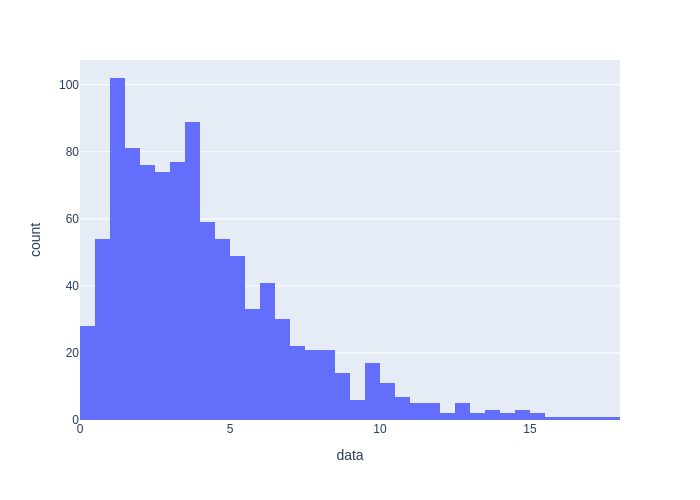

Mean: 4.1721103237245405, Median: 3.524066165790975


In [32]:
from scipy import stats
import pandas as pd
import numpy as np
import plotly.express as px

# Generate data for the gamma distribution
sample1 = stats.gamma(a=2, scale=2).rvs(size=1000)

# Create histogram for sample1
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data")

# Display the histogram
fig1.show(renderer="png")  # Use renderer="png" if submitting to GitHub or MarkUs

# Calculate mean and median of sample1
mean_sample1 = sample1.mean()
median_sample1 = np.quantile(sample1, [0.5])[0]

# Generate data for negative gamma distribution
sample2 = -stats.gamma(a=2, scale=2).rvs(size=1000)

print(f"Mean: {mean_sample1}, Median: {median_sample1}")


The difference between mean and median is that mean is the average of a dataset; to find mean take the sum of all values then divide that by the number of values. If there are any extreme data points(outliers), then the mean will be affected by it and it will be skewed to the left or right. It will be skewed to the left if there are more extreme values on the left, and skewed to the right if there are more extreme values on the right. This means that if the mean will be greater(right) or less(left) than the median. In contrast to the mean, the median is not affected by outliers. The median is the middle point of values in a dataset if you were to arrange them in order from smallest to greatest. For example on the graph above, we can see that it is right-skewed. We can see this by the mean being greater than the median, which tells us that the outliers on the right raised the mean higher.

Question 6

   restaurant id  category id  item id  serving size (oz)  calories  \
0           1000          100        0                4.8       300   
1           1000          100        1                4.8       250   
2           1000          100        2                3.9       370   
3           1000          100        3                5.7       450   
4           1000          100        4                5.7       400   

   calories from fat total fat (g)  total fat (% daily value)  \
0              120.0          13.0                       20.0   
1               70.0           8.0                       12.0   
2              200.0          23.0                       35.0   
3              250.0          28.0                       43.0   
4              210.0          23.0                       35.0   

   saturated fat (g)  saturated fat (% daily value)  ...  carbohydrates (g)  \
0                5.0                           25.0  ...                 31   
1                3.0    

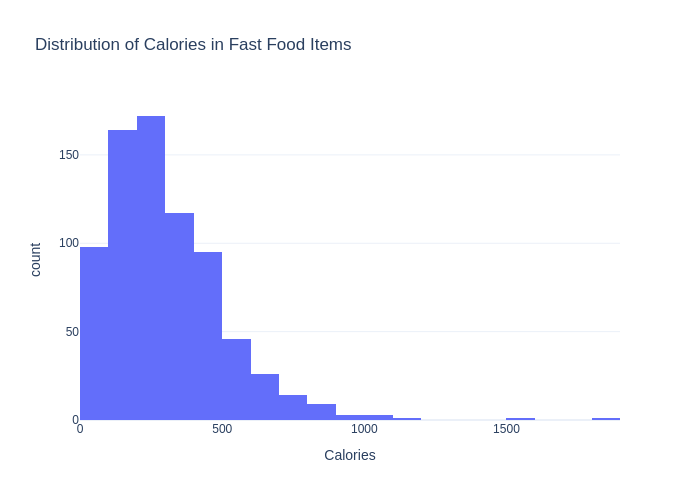

In [33]:
import pandas as pd
import plotly.express as px

# Load the dataset from the URL
df = pd.read_csv("https://raw.githubusercontent.com/manuelamc14/fast-food-Nutritional-Database/main/Tables/nutrition.csv")

# Check the first few rows and column names to decide which column to use
print(df.head())
print("\nColumn names in the dataset:")
print(df.columns)

# Create a histogram for a specific column (e.g., 'calories')
fig = px.histogram(df, 
                   x='calories',     # Replace 'calories' with any other numerical column if desired
                   nbins=30,         # Adjust the number of bins
                   title='Distribution of Calories in Fast Food Items',
                   labels={'calories': 'Calories'},  # Axis label
                   template="plotly_white")

# Show the plot
fig.show(renderer="png")


From the above histogram we can see that is skewed to the right, meaning that the mean is a greater value than the median. It is also unimodal.

Question 7

In [37]:
import plotly.express as px
df = px.data.gapminder()
px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])

Question 8

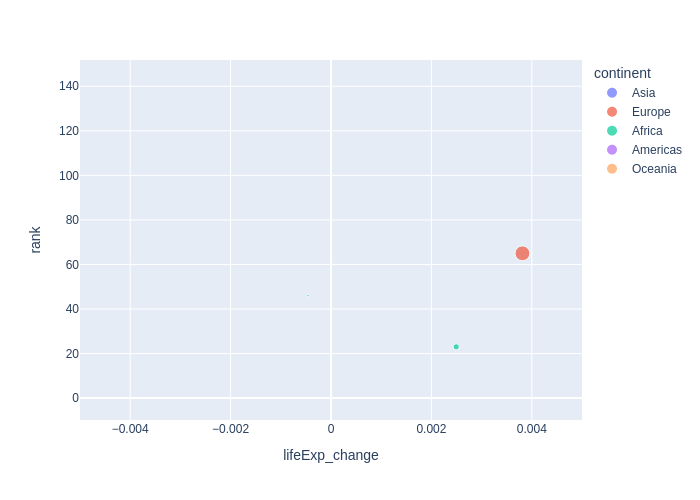

In [36]:
import plotly.express as px
import pandas as pd

# Load the Gapminder dataset
df = px.data.gapminder()

# Calculate percent change for life expectancy for each country
df['lifeExp_change'] = df.groupby('country')['lifeExp'].pct_change()

# Assign a rank based on life expectancy in the last year available (2007)
df['rank'] = df[df['year'] == 2007].sort_values('lifeExp')['country'].rank(method='first').astype(int)

# For simplicity, let's say percent is just the population as a percentage of total population
total_pop = df['pop'].sum()
df['percent'] = df['pop'] / total_pop

# Create the scatter plot with the specified modifications
fig = px.scatter(df.dropna(subset=['lifeExp_change', 'rank']),  # Drop rows with NaN values
                 x="lifeExp_change",      # Set x to "percent change" (using lifeExp_change)
                 y="rank",                # Set y to "rank"
                 animation_frame="year",  # Set animation_frame to "year"
                 animation_group="country",# Set animation_group to "country"
                 size="percent",          # Set size to "percent"
                 color="continent",       # Set color to "continent"
                 hover_name="country",    # Set hover_name to "country"
                 size_max=50,             # Set size_max to 50
                 range_x=[-0.005, 0.005]) # Set range_x

# Show the plot
fig.show(renderer="png")

Question 9
Yes

You're welcome! Here's a summary of the chatlog:

You initially worked with a penguins dataset and loaded it into a table using pandas.
You then requested assistance with adding vertical and horizontal markers for statistical values (mean, median, range, interquartile range, etc.) to Plotly histograms of flipper_length_mm for each penguin species.
Afterward, you asked for a cleaner version of the Plotly code without shaded areas to make the graphs clearer.
Next, you wanted to switch to Seaborn's KDE plots (Kernel Density Estimators) and organize them in a row of three, with markers for mean and median.
You noted that Seaborn extends Matplotlib, and you mentioned the possibility of combining Matplotlib functions like ax.fill_between() with Seaborn plots. I provided a new version of the code that combined Seaborn KDE with Matplotlib for highlighting statistical regions (IQR and ±2 standard deviations).
Finally, you asked about the differences between box plots, histograms, and KDEs, and I confirmed your understanding, summarizing the strengths and weaknesses of each type of plot in detail.
Let me know if you need any additional clarifications!

You're welcome! Here's a summary of our recent interactions:

1. **Sample Variance vs. Sample Standard Deviation**:
   - I explained the differences between sample variance and sample standard deviation, highlighting that variance measures the average of squared deviations (in squared units), while the standard deviation is the square root of the variance (in the original units of the data).

2. **Identifying the Mean in a Graph**:
   - I discussed how to identify or mark the mean on various types of graphs (histograms, box plots, KDE plots, scatter plots, and line graphs), focusing on how it can be shown as a vertical line or marker depending on the graph.

3. **Handling a Histogram with No Significant Peak**:
   - I explained how to locate the mean in a histogram with no clear peak, suggesting that you calculate the mean mathematically and mark it with a vertical line, while explaining how skewness might affect the position of the mean.

4. **Modifying Code to Add Mean and Standard Deviation**:
   - You shared a Plotly-based Python code for histograms, and I helped you modify it to include the calculation and visualization of the mean and standard deviation for each dataset using `np.mean()`, `np.std()`, and `np.var()`. I also helped you add vertical lines to mark the mean and ±1 standard deviation for each histogram.

If you'd like further clarifications or additional help, feel free to ask!
https://chatgpt.com/share/66f5f19e-bc2c-8011-87a5-79e8136a7d69

Of course! Here’s a summary of what we discussed:

1. **Difference Between Sample Variance and Sample Standard Deviation**:
   - Sample variance is the average of squared deviations from the mean (in squared units).
   - Sample standard deviation is the square root of the variance and is in the same units as the data, making it easier to interpret.

2. **Identifying the Mean in Graphs**:
   - In different types of plots (histograms, box plots, KDEs, etc.), the mean is typically represented as a vertical line or marker. I explained how to identify or visualize the mean, depending on the plot type.

3. **Handling Histograms Without a Significant Peak**:
   - When a histogram lacks a clear peak, I explained that you can calculate the mean mathematically and visualize it by drawing a vertical line on the plot, regardless of how spread out or uniform the data appears.

4. **Adding Mean and Standard Deviation to Plotly Histograms**:
   - I helped modify your Python code to compute the mean and standard deviation for multiple datasets. I also guided you on adding vertical lines to each histogram to mark the mean and ±1 standard deviation using Plotly.

This covers our key points of discussion! Let me know if you'd like to dive deeper into any of these topics.
https://chatgpt.com/share/66f5f1b6-a684-8011-a0cb-e2b90ed78ed3

Certainly! Here's a summary of our chat:

1. **Relationship between Mean and Median**: We discussed the difference between the mean (average) and the median (middle value) and how they behave in different distributions, particularly in skewed distributions.
  
2. **Python Code for Gamma Distribution**: You shared Python code generating samples from a Gamma distribution, calculating the mean and median. We discussed how to interpret these values when a distribution is skewed. 

3. **Troubleshooting Python Code**: There was an issue with your code not displaying the expected results. We debugged by focusing on rendering histograms and analyzing distribution characteristics.

4. **Visualization with Plotly**: You requested help generating a histogram using Plotly. I provided a Python code that loaded the historical spending dataset and created histograms to visualize the distribution of `spending_usd`.

5. **Different Dataset (Fast-Food Nutrition)**: You then provided a new dataset related to fast-food nutrition, and we discussed how to load this CSV file using Pandas. I also provided code to create a histogram (for calories) using Plotly to visualize the distribution of nutritional data.

Let me know if you'd like any more help or adjustments!

https://chatgpt.com/share/66f5f16f-cd68-8011-89b5-e9ca7d641d0e

Here's a summary of our interactions:

1. **Gapminder Plotly Scatter Plot Modifications**:
   - You provided code that used the Gapminder dataset and wanted help with modifying the `px.scatter()` function.
   - Initially, you requested a set of general modifications, but later clarified that you wanted specific changes where:
     - X-axis = "percent change"
     - Y-axis = "rank"
     - Size = "percent"
     - Color = "sex"
     - Animation frame = "year"
     - Animation group = "name"
   - You also asked to remove `log_x=True` and `range_y`.

2. **Error Troubleshooting**:
   - After attempting to run the modified code, you encountered a `ValueError` because the Gapminder dataset doesn't contain the columns you specified (e.g., "percent change", "rank", "percent").
   - I explained that the Gapminder dataset does not have those columns and suggested either using a different dataset or creating the necessary columns based on the available data.

3. **Modified Example**:
   - I provided a solution that computed new columns for "percent change" (using life expectancy), "rank" (based on life expectancy in 2007), and "percent" (using population as a percentage of the total population).
   - The solution updated the Plotly scatter plot using these calculated columns while retaining the original animation settings.

Let me know if you'd like more details or if there's anything else I can assist with!
https://chatgpt.com/share/66f5f9ac-9cc0-8011-9d8e-cb764135b9be